In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Load the data

In [2]:
data_url='stock.csv'
raw_df = pd.read_csv(data_url)
stocks_df = raw_df.copy()
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


## Visualize the data

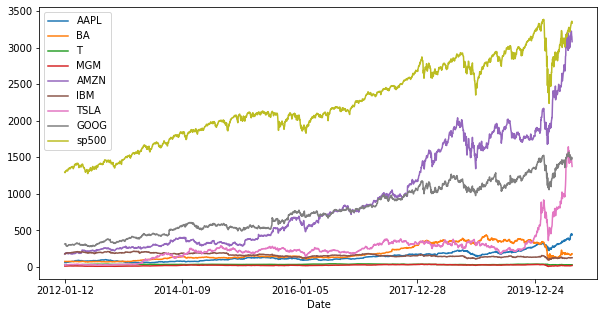

In [3]:
stocks_df.plot(x='Date', figsize=(10,5));

In [4]:
# interactive plot using plotly
fig = px.line(title='Stock market data from 2012 - 2020')
for col in stocks_df.columns[1:]:
  fig.add_scatter(x=stocks_df['Date'], y=stocks_df[col], name=col)
fig.show()

## Analysis

We have historic data of stocks from 2012–2020.<br>
Lets suppose that one of our client had invested 10,000,00$.<br> Client was young and invested in popular equities after studying the market.

Securites : [AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG, SP500]<br>
Time-span 2012–2020<br>
Did the client win big time or lost the money ? Lets do some analysis using the historic data. We don't know the actual allocation percentage, this is a simulation and we are experimenting so lets not sweat and use random values.


In [5]:
np.random.seed(142)
# create random weights
Weights = np.random.random(len(stocks_df.columns[1:]))
# make the weigts sums to one
Weights = Weights/sum(Weights)

# check wheather weights sums to one
w_sum = 0
for w in Weights:
  w_sum+=w
print('Sum of Weights',w_sum)

Sum of Weights 1.0


## Σweight*security

In [6]:
historic_data = stocks_df.values[:,1:]
start = stocks_df.values[0,1:]

# lets divide the  historic data with starting value
X = historic_data / start


# allocation = Weights*1000000
portfolio_daily_worth = X@Weights

portfolio_daily_worth = portfolio_daily_worth*1000000

In [7]:
stocks_df['portfolio daily worth in $'] = portfolio_daily_worth
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000,1000000.0
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966,969484.043172
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,995056.179746
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,1008494.330663
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,1012190.366178


## Portfolio daily return 
Let's calculate the portfolio daily return 

In [8]:
val = stocks_df['portfolio daily worth in $'].copy().values
daily_return = [0]
for i,v in enumerate(val):
  if i==0:
    continue
  daily_return.append(((val[i]-val[i-1])/val[i-1])*100)

In [9]:
stocks_df['portfolio daily % return'] = daily_return
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000,1000000.0,0.000000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966,969484.043172,-3.051596
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,995056.179746,2.637706
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,1008494.330663,1.350492
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,1012190.366178,0.366490


## Visualization

In [10]:
import plotly.express as px

fig = px.line(stocks_df, x='Date', y='portfolio daily % return', title='Portfolio daily percentage return')
fig.show()

In [11]:
# historgram of daily % return
import plotly.express as px
fig = px.histogram(data_frame=stocks_df, x='portfolio daily % return')
fig.show()

In [12]:
# 'Portfolio individual stocks worth in $ over time'
import plotly.express as px

historic_data = raw_df.copy().values[:,1:]
start = raw_df.copy().values[0,1:]
X = historic_data/start

for i in range(9):
  X[:,i] = X[:,i]*Weights[i]*100

fig = px.line(title='Portfolio individual stocks worth in $ over time')
for i, col in enumerate(raw_df.columns[1:]):
  fig.add_scatter(x=raw_df.Date, y=X[:,i], name=col)

fig.show()


## Cumulative return

* The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one. 
* Reinvesting the dividends or capital gains of an investment impacts its cumulative return.


> stock cumulaative return = ( current price - original price ) / original price


​


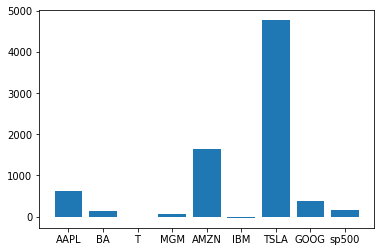

In [13]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)

stock_cumulative_return = ( ( X[-1,:] - X[0,:] )/X[0,:] )*100

plt.bar(x=raw_df.columns[1:], height=stock_cumulative_return);

## Standard deviation
* Standard deviation is a measure of spread around the mean
* Volatile stocks have high standard deviation, so standard deviation represent risk associated with securities

> standard deviation = sqrt( variance )

> variance = Σ (value - mean ) / number 


In [14]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(stocks_df['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.8895309916054985


## Sharpe ratio
Sharpe ratio help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

* The Sharpe ratio adjusts a portfolio’s past performance—or expected future performance—for the excess risk that was taken by the investor.
* A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns.
* The Sharpe ratio has several weaknesses, including an assumption that investment returns are normally distributed.

In [15]:
# Portfolio sharpe ratio

# annual sharpe-ratio = ( averge-daily-return / standard-deviation of daily-return ) * sqrt(number of trading-days in a year)

sharpe_ratio = stocks_df['portfolio daily % return'].mean() / stocks_df['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))


#  we want to maximize the return compared to the risk , so will try to maximize the sharpe ration for portfolio optimization

Sharpe ratio of the portfolio is 1.0887036863675885
